In [ ]:
import pandas as pd
import numpy as np

# Load the dataset from an Excel file
df = pd.read_excel('AXPO.xlsx')  # Replace 'your_file_name.xlsx' with the actual file name

# Assuming the dataset has two columns: 'Physical_Consumption' and 'Last_Day_Ahead'
df['Difference'] = df['Physical_Consumption'] - df['Last_Day_Ahead']

# Step 2: Apply CUSUM Analysis
df['CUSUM'] = df['Difference'].cumsum()

# Step 3: Apply Outlier Detection
# Calculate the Z-score for the differences
df['Z_Score'] = (df['Difference'] - df['Difference'].mean()) / df['Difference'].std()

# Identify outliers (using a threshold of 3)
df['Outlier'] = np.abs(df['Z_Score']) > 3

# Display the first few rows of the result
print(df.head())

# If you want to display the entire DataFrame or save it to a new Excel file
df.to_excel('CUSUM_Outlier_Analysis.xlsx', index=False)
print("Data has been saved to 'CUSUM_Outlier_Analysis.xlsx'")


             Datetime  Last_Day_Ahead  Physical_Consumption  Difference  \
0 2022-10-01 00:00:00         133.065            120.373276  -12.691724   
1 2022-10-01 00:15:00         132.935            121.267144  -11.667856   
2 2022-10-01 00:30:00         132.870            121.686696  -11.183304   
3 2022-10-01 00:45:00         132.809            119.117136  -13.691864   
4 2022-10-01 01:00:00         132.470            118.929040  -13.540960   

       CUSUM   Z_Score  Outlier  
0 -12.691724 -0.480973    False  
1 -24.359580 -0.365850    False  
2 -35.542884 -0.311367    False  
3 -49.234748 -0.593429    False  
4 -62.775708 -0.576461    False  
Data has been saved to 'CUSUM_Outlier_Analysis.xlsx'


In [ ]:
# Fourier Transform

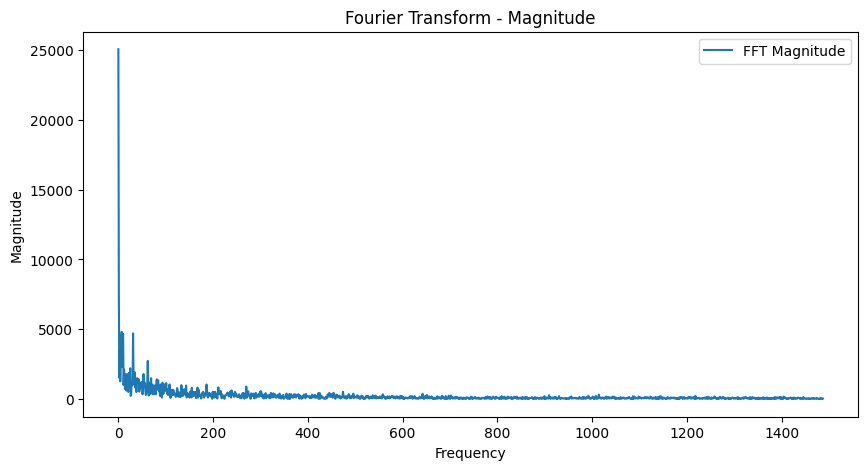

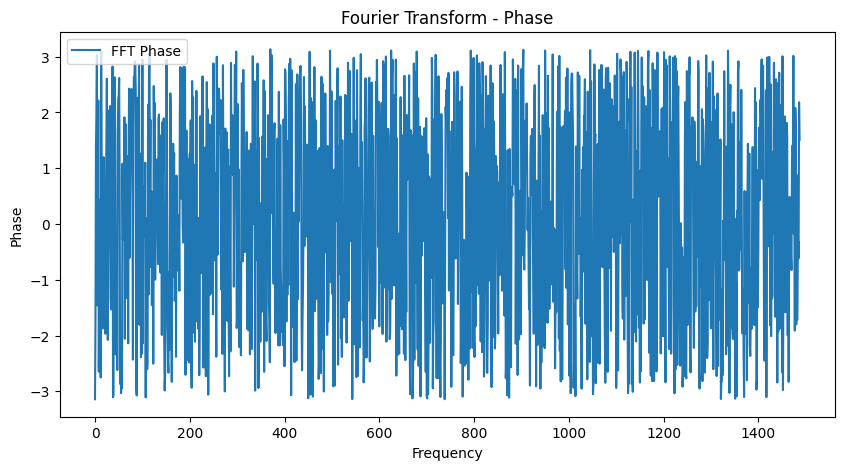

In [1]:
import numpy as np
import pandas as pd
from scipy.fft import fft
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_excel('AXPO.xlsx')  # Replace with your file path
df['Difference'] = df['Physical_Consumption'] - df['Last_Day_Ahead']

# Calculate Fourier Transform of the 'Difference' column
fft_values = fft(df['Difference'].values)
fft_magnitude = np.abs(fft_values)
fft_phase = np.angle(fft_values)

# Plot FFT Magnitude
plt.figure(figsize=(10, 5))
plt.plot(fft_magnitude[:len(fft_magnitude)//2], label="FFT Magnitude")
plt.title("Fourier Transform - Magnitude")
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

# Plot FFT Phase
plt.figure(figsize=(10, 5))
plt.plot(fft_phase[:len(fft_phase)//2], label="FFT Phase")
plt.title("Fourier Transform - Phase")
plt.xlabel("Frequency")
plt.ylabel("Phase")
plt.legend()
plt.show()


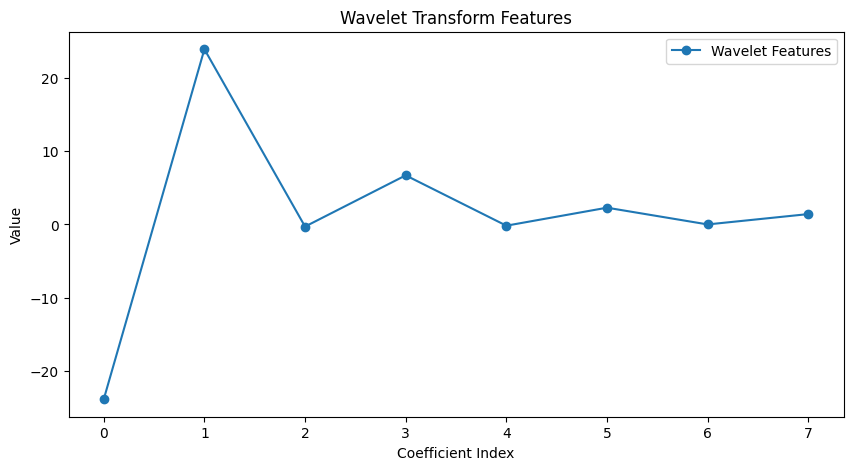

In [5]:
# 2. Wavelet Transform

import pywt

# Function to calculate wavelet features
def wavelet_features(series, wavelet="db1", level=3):
    coeffs = pywt.wavedec(series, wavelet, level=level)
    features = []
    for coeff in coeffs:
        features.append(np.mean(coeff))
        features.append(np.std(coeff))
    return features

# Calculate Wavelet Features for the 'Difference' column
wavelet_feats = wavelet_features(df['Difference'].values)

# Plot Wavelet Features
plt.figure(figsize=(10, 5))
plt.plot(wavelet_feats, marker='o', label="Wavelet Features")
plt.title("Wavelet Transform Features")
plt.xlabel("Coefficient Index")
plt.ylabel("Value")
plt.legend()
plt.show()


In [9]:
# 3. Entropy-Based Measures

from scipy.stats import entropy

# Shannon Entropy
shannon_entropy = entropy(np.abs(df['Difference'].value_counts(normalize=True)), base=2)

# Permutation Entropy
def permutation_entropy(time_series, order=3, delay=1):
    n = len(time_series)
    permutations = [np.argsort(time_series[i:i+order]) for i in range(n - order + 1)]
    _, counts = np.unique(permutations, axis=0, return_counts=True)
    probs = counts / counts.sum()
    return -np.sum(probs * np.log2(probs))

perm_entropy = permutation_entropy(df['Difference'].values)

# Print Entropy Values
print("Shannon Entropy:", shannon_entropy)
print("Permutation Entropy:", perm_entropy)


Shannon Entropy: 11.539158811108031
Permutation Entropy: 2.5083809494648257


C:\Users\dy46\AppData\Local\Temp\ipykernel_21092\401755807.py:10: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(range(1, 11), autocorr_values[1:11], use_line_collection=True)


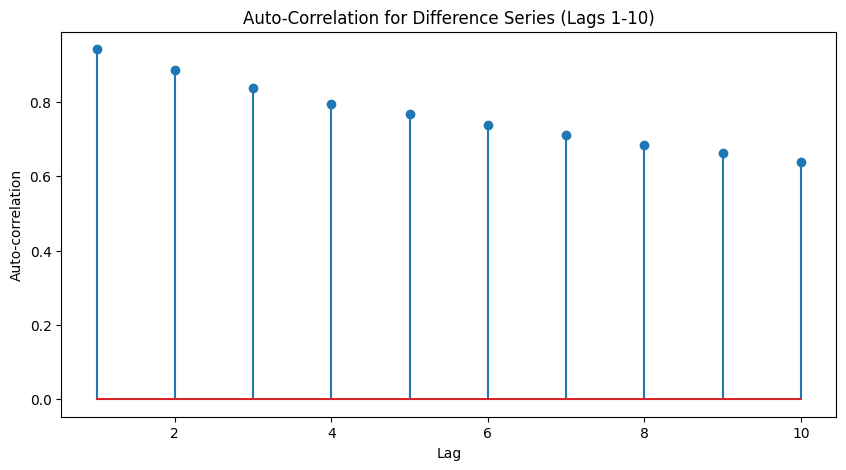

In [13]:
# 4. Auto-Correlation

from statsmodels.tsa.stattools import acf

# Calculate Auto-correlation for lags up to 10
autocorr_values = acf(df['Difference'].values, fft=True, nlags=10)

# Plot Auto-correlation
plt.figure(figsize=(10, 5))
plt.stem(range(1, 11), autocorr_values[1:11], use_line_collection=True)
plt.title("Auto-Correlation for Difference Series (Lags 1-10)")
plt.xlabel("Lag")
plt.ylabel("Auto-correlation")
plt.show()


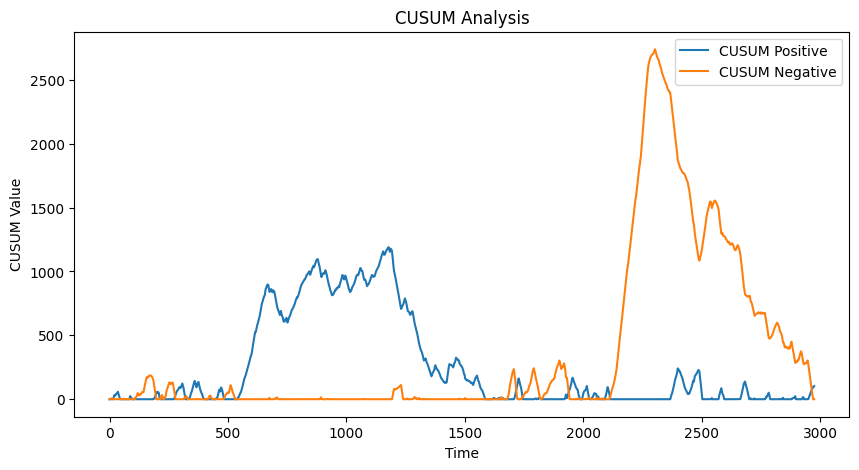

In [17]:
# 5. CUSUM Analysis

# Define parameters for CUSUM calculation
mu = df['Difference'].mean()
k = 0.5 * df['Difference'].std()

# Initialize CUSUM columns
df['CUSUM_Positive'] = 0
df['CUSUM_Negative'] = 0

# Calculate CUSUM
for t in range(1, len(df)):
    diff = df.loc[t, 'Difference'] - mu
    df.loc[t, 'CUSUM_Positive'] = max(0, df.loc[t-1, 'CUSUM_Positive'] + diff - k)
    df.loc[t, 'CUSUM_Negative'] = max(0, df.loc[t-1, 'CUSUM_Negative'] - diff - k)

# Plot CUSUM
plt.figure(figsize=(10, 5))
plt.plot(df['CUSUM_Positive'], label="CUSUM Positive")
plt.plot(df['CUSUM_Negative'], label="CUSUM Negative")
plt.title("CUSUM Analysis")
plt.xlabel("Time")
plt.ylabel("CUSUM Value")
plt.legend()
plt.show()


In [18]:
import pandas as pd
import numpy as np

# Load the dataset from an Excel file
df = pd.read_excel('AXPO.xlsx')  # Replace 'your_file_name.xlsx' with the actual file name

# Assuming the dataset has two columns: 'Physical_Consumption' and 'Last_Day_Ahead'
df['Difference'] = df['Physical_Consumption'] - df['Last_Day_Ahead']

# Step 1: Calculate the IQR
Q1 = df['Difference'].quantile(0.25)
Q3 = df['Difference'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the lower and upper bounds for detecting outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
df['Outlier'] = (df['Difference'] < lower_bound) | (df['Difference'] > upper_bound)

# Print the result
print(df[['Difference', 'Outlier']])

# Optionally, display the number of outliers detected
print(f"Number of outliers detected: {df['Outlier'].sum()}")


      Difference  Outlier
0     -12.691724    False
1     -11.667856    False
2     -11.183304    False
3     -13.691864    False
4     -13.540960    False
...          ...      ...
2971   -4.615892    False
2972   -0.896912    False
2973   -2.343864    False
2974   -2.271060    False
2975   -1.958264    False

[2976 rows x 2 columns]
Number of outliers detected: 25


In [19]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset from an Excel file
df = pd.read_excel('AXPO.xlsx')  # Replace with the actual file name

# Calculate the difference between real and forecasted schedules
df['Difference'] = df['Physical_Consumption'] - df['Last_Day_Ahead']

# MASE Calculation
def mase(actual, forecast):
    n = len(actual)
    d = np.sum(np.abs(np.diff(actual)))
    errors = np.abs(actual - forecast)
    return np.mean(errors) * (n / d)

# MAPE Calculation
def mape(actual, forecast):
    return np.mean(np.abs((actual - forecast) / actual)) * 100

# Huber Loss Calculation
def huber_loss(actual, forecast, delta=1.0):
    residual = np.abs(actual - forecast)
    is_small_error = residual <= delta
    small_error_loss = 0.5 * (residual ** 2)
    large_error_loss = delta * residual - 0.5 * (delta ** 2)
    return np.where(is_small_error, small_error_loss, large_error_loss).mean()

# Quantile Loss Calculation
def quantile_loss(actual, forecast, quantile=0.5):
    residual = actual - forecast
    return np.mean(np.maximum(quantile * residual, (quantile - 1) * residual))

# R² Calculation
r_squared = r2_score(df['Physical_Consumption'], df['Last_Day_Ahead'])

# Calculating metrics
mase_value = mase(df['Physical_Consumption'], df['Last_Day_Ahead'])
mape_value = mape(df['Physical_Consumption'], df['Last_Day_Ahead'])
huber_loss_value = huber_loss(df['Physical_Consumption'], df['Last_Day_Ahead'])
quantile_loss_value = quantile_loss(df['Physical_Consumption'], df['Last_Day_Ahead'], quantile=0.5)

# Create a summary DataFrame
results = {
    'R_squared': r_squared,
    'MASE': mase_value,
    'MAPE': mape_value,
    'Huber Loss': huber_loss_value,
    'Quantile Loss': quantile_loss_value
}

results_df = pd.DataFrame([results])

# Save the results to an Excel file
results_df.to_excel('forecast_metrics_summary.xlsx', index=False)

# Display the results
print(results_df)


   R_squared      MASE      MAPE  Huber Loss  Quantile Loss
0  -1.634152  6.731766  8.193615    9.084955       4.785019


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import HuberRegressor

# Assuming the DataFrame is already loaded as df
# Adjust column names according to the ones you provided
real_schedule_column = 'Last_Day_Ahead'
forecasted_schedule_column = 'Physical_Consumption'
date_column_name = 'Datetime'

# Convert the date column to datetime if not already
df[date_column_name] = pd.to_datetime(df[date_column_name])

results = []

# Loop over each day in the dataset
for day in df[date_column_name].dt.date.unique():
    # Filter data for the specific day
    day_data = df[df[date_column_name].dt.date == day]
    
    # Calculate metrics
    r_squared = r2_score(day_data[real_schedule_column], day_data[forecasted_schedule_column])
    
    # Mean Absolute Scaled Error (MASE)
    mase = np.mean(np.abs(day_data[real_schedule_column] - day_data[forecasted_schedule_column])) / np.mean(np.abs(np.diff(day_data[real_schedule_column])))
    
    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((day_data[real_schedule_column] - day_data[forecasted_schedule_column]) / day_data[real_schedule_column])) * 100
    
    # Huber Loss
    huber = HuberRegressor().fit(day_data[[forecasted_schedule_column]], day_data[real_schedule_column])
    predictions = huber.predict(day_data[[forecasted_schedule_column]])
    delta = 1.0  # You can adjust the delta value if needed
    residuals = day_data[real_schedule_column] - predictions
    huber_loss = np.where(np.abs(residuals) <= delta, 0.5 * residuals ** 2, delta * (np.abs(residuals) - 0.5 * delta)).mean()
    
    # Quantile Loss (using 50th percentile/median for simplicity)
    quantile_loss = np.mean(np.maximum(0, (day_data[forecasted_schedule_column] - day_data[real_schedule_column])) * 0.5 + np.maximum(0, (day_data[real_schedule_column] - day_data[forecasted_schedule_column])) * (1 - 0.5))
    
    # Append the results to the list
    results.append([day, r_squared, mase, mape, huber_loss, quantile_loss])

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results, columns=['Date', 'R_squared', 'MASE', 'MAPE', 'Huber Loss', 'Quantile Loss'])

# Save the results to an Excel file
results_df.to_excel('forecasting_metrics_by_day.xlsx', index=False)

# Display the first few rows of the results
print(results_df.head())


         Date  R_squared       MASE       MAPE  Huber Loss  Quantile Loss
0  2022-10-01  -2.846853  12.094629   6.811062    3.201241       4.436501
1  2022-10-02 -22.692933  25.937946  10.413618    0.956787       6.677110
2  2022-10-03  -3.556761  16.435591   7.573741    4.398730       4.970728
3  2022-10-04  -0.510737   6.710986   4.665532    5.514380       3.198350
4  2022-10-05  -3.254204  12.375349   6.362528    3.201634       4.406796


In [ ]:
from sklearn.ensemble import IsolationForest

iso_forest = IsolationForest(contamination=0.01)  # Assume 1% of the data are anomalies
df['Anomaly_Score'] = iso_forest.fit_predict(df[['Difference']])
df['Anomaly'] = df['Anomaly_Score'] == -1


In [ ]:
df['Anomaly']

0       False
1       False
2       False
3       False
4       False
        ...  
2971    False
2972    False
2973    False
2974    False
2975    False
Name: Anomaly, Length: 2976, dtype: bool

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['Difference'], order=(5,1,0))  # Adjust order as needed
model_fit = model.fit()
df['Residuals'] = model_fit.resid
df['Anomaly'] = np.abs(df['Residuals']) > (2 * df['Residuals'].std())  # 2 standard deviations


In [ ]:
df['Anomaly']

0        True
1       False
2       False
3       False
4       False
        ...  
2971    False
2972    False
2973    False
2974    False
2975    False
Name: Anomaly, Length: 2976, dtype: bool

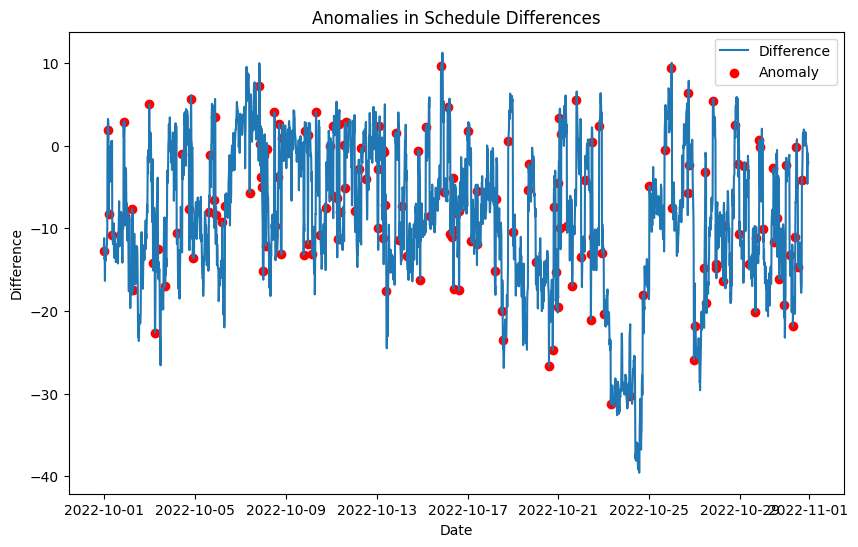

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(df[date_column_name], df['Difference'], label='Difference')
plt.scatter(df[df['Anomaly']][date_column_name], df[df['Anomaly']]['Difference'], color='red', label='Anomaly')
plt.xlabel('Date')
plt.ylabel('Difference')
plt.title('Anomalies in Schedule Differences')
plt.legend()
plt.show()


In [32]:
df.to_excel('anomalies_detected.xlsx', index=False)


In [33]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import HuberRegressor

# Assuming the DataFrame is already loaded as df
# Adjust column names according to the ones you provided
real_schedule_column = 'Last_Day_Ahead'
forecasted_schedule_column = 'Physical_Consumption'
date_column_name = 'Datetime'

# Convert the date column to datetime if not already
df[date_column_name] = pd.to_datetime(df[date_column_name])

results = []

# Define thresholds for anomaly detection (these are examples and should be adjusted based on your data)
r_squared_threshold = 0.5   # R-squared should ideally be close to 1
mase_threshold = 2.0        # MASE threshold (example value)
mape_threshold = 10.0       # MAPE threshold (example value, in percentage)
huber_loss_threshold = 3.0  # Huber Loss threshold (example value)
quantile_loss_threshold = 2.0  # Quantile Loss threshold (example value)

# Loop over each day in the dataset
for day in df[date_column_name].dt.date.unique():
    # Filter data for the specific day
    day_data = df[df[date_column_name].dt.date == day]
    
    # Calculate metrics
    r_squared = r2_score(day_data[real_schedule_column], day_data[forecasted_schedule_column])
    
    # Mean Absolute Scaled Error (MASE)
    mase = np.mean(np.abs(day_data[real_schedule_column] - day_data[forecasted_schedule_column])) / np.mean(np.abs(np.diff(day_data[real_schedule_column])))
    
    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((day_data[real_schedule_column] - day_data[forecasted_schedule_column]) / day_data[real_schedule_column])) * 100
    
    # Huber Loss
    huber = HuberRegressor().fit(day_data[[forecasted_schedule_column]], day_data[real_schedule_column])
    predictions = huber.predict(day_data[[forecasted_schedule_column]])
    delta = 1.0  # You can adjust the delta value if needed
    residuals = day_data[real_schedule_column] - predictions
    huber_loss = np.where(np.abs(residuals) <= delta, 0.5 * residuals ** 2, delta * (np.abs(residuals) - 0.5 * delta)).mean()
    
    # Quantile Loss (using 50th percentile/median for simplicity)
    quantile_loss = np.mean(np.maximum(0, (day_data[forecasted_schedule_column] - day_data[real_schedule_column])) * 0.5 + np.maximum(0, (day_data[real_schedule_column] - day_data[forecasted_schedule_column])) * (1 - 0.5))
    
    # Determine if the day should be flagged as an anomaly
    anomaly_flag = (
        (r_squared < r_squared_threshold) or 
        (mase > mase_threshold) or 
        (mape > mape_threshold) or 
        (huber_loss > huber_loss_threshold) or 
        (quantile_loss > quantile_loss_threshold)
    )
    
    # Append the results to the list
    results.append([day, r_squared, mase, mape, huber_loss, quantile_loss, anomaly_flag])

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results, columns=['Date', 'R_squared', 'MASE', 'MAPE', 'Huber Loss', 'Quantile Loss', 'Anomaly'])

# Save the results to an Excel file
results_df.to_excel('forecasting_metrics_by_day_with_anomalies.xlsx', index=False)

# Display the first few rows of the results
print(results_df.head())


         Date  R_squared       MASE       MAPE  Huber Loss  Quantile Loss  \
0  2022-10-01  -2.846853  12.094629   6.811062    3.201241       4.436501   
1  2022-10-02 -22.692933  25.937946  10.413618    0.956787       6.677110   
2  2022-10-03  -3.556761  16.435591   7.573741    4.398730       4.970728   
3  2022-10-04  -0.510737   6.710986   4.665532    5.514380       3.198350   
4  2022-10-05  -3.254204  12.375349   6.362528    3.201634       4.406796   

   Anomaly  
0     True  
1     True  
2     True  
3     True  
4     True  


In [34]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

results = []

# Loop over each day in the dataset
for day in df[date_column_name].dt.date.unique():
    # Filter data for the specific day
    day_data = df[df[date_column_name].dt.date == day]
    
    # Calculate metrics as before...
    
    # Breusch-Pagan test for heteroscedasticity
    X = sm.add_constant(day_data[forecasted_schedule_column])
    model = sm.OLS(day_data[real_schedule_column], X).fit()
    test_stat, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
    
    # Determine heteroscedasticity presence (p-value < 0.05 suggests heteroscedasticity)
    heteroscedasticity_flag = p_value < 0.05
    
    # Combine this with other metrics to flag anomalies
    anomaly_flag = (
        heteroscedasticity_flag or
        (r_squared < r_squared_threshold) or 
        (mase > mase_threshold) or 
        (mape > mape_threshold) or 
        (huber_loss > huber_loss_threshold) or 
        (quantile_loss > quantile_loss_threshold)
    )
    
    results.append([day, r_squared, mase, mape, huber_loss, quantile_loss, heteroscedasticity_flag, anomaly_flag])

# Convert results to DataFrame and save as before...


In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import HuberRegressor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming the DataFrame is already loaded as df
# Adjust column names according to the ones you provided
real_schedule_column = 'Last_Day_Ahead'
forecasted_schedule_column = 'Physical_Consumption'
date_column_name = 'Datetime'

# Convert the date column to datetime if not already
df[date_column_name] = pd.to_datetime(df[date_column_name])

results = []

# Loop over each day in the dataset
for day in df[date_column_name].dt.date.unique():
    # Filter data for the specific day
    day_data = df[df[date_column_name].dt.date == day]
    
    # Calculate metrics
    r_squared = r2_score(day_data[real_schedule_column], day_data[forecasted_schedule_column])
    
    # Mean Absolute Scaled Error (MASE)
    mase = np.mean(np.abs(day_data[real_schedule_column] - day_data[forecasted_schedule_column])) / np.mean(np.abs(np.diff(day_data[real_schedule_column])))
    
    # Mean Absolute Percentage Error (MAPE)
    mape = np.mean(np.abs((day_data[real_schedule_column] - day_data[forecasted_schedule_column]) / day_data[real_schedule_column])) * 100
    
    # Huber Loss
    huber = HuberRegressor().fit(day_data[[forecasted_schedule_column]], day_data[real_schedule_column])
    predictions = huber.predict(day_data[[forecasted_schedule_column]])
    delta = 1.0  # You can adjust the delta value if needed
    residuals = day_data[real_schedule_column] - predictions
    huber_loss = np.where(np.abs(residuals) <= delta, 0.5 * residuals ** 2, delta * (np.abs(residuals) - 0.5 * delta)).mean()
    
    # Quantile Loss (using 50th percentile/median for simplicity)
    quantile_loss = np.mean(np.maximum(0, (day_data[forecasted_schedule_column] - day_data[real_schedule_column])) * 0.5 + np.maximum(0, (day_data[real_schedule_column] - day_data[forecasted_schedule_column])) * (1 - 0.5))
    
    # Breusch-Pagan test for heteroscedasticity
    X = sm.add_constant(day_data[forecasted_schedule_column])
    model = sm.OLS(day_data[real_schedule_column], X).fit()
    test_stat, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
    
    # Determine heteroscedasticity presence (p-value < 0.05 suggests heteroscedasticity)
    heteroscedasticity_flag = p_value < 0.05
    
    # Combine this with other metrics to flag anomalies
    anomaly_flag = (
        heteroscedasticity_flag or
        (r_squared < 0.8) or 
        (mase > 1.0) or 
        (mape > 10.0) or 
        (huber_loss > 2.0) or 
        (quantile_loss > 2.0)
    )
    
    results.append([day, r_squared, mase, mape, huber_loss, quantile_loss, heteroscedasticity_flag, anomaly_flag])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Date', 'R_squared', 'MASE', 'MAPE', 'Huber Loss', 'Quantile Loss', 'Heteroscedasticity_Flag', 'Anomaly_Flag'])

# Save the results to an Excel file
results_df.to_excel('forecasting_metrics_with_anomalies_by_day.xlsx', index=False)

# Display the first few rows of the results
print(results_df.head())


         Date  R_squared       MASE       MAPE  Huber Loss  Quantile Loss  \
0  2022-10-01  -2.846853  12.094629   6.811062    3.201241       4.436501   
1  2022-10-02 -22.692933  25.937946  10.413618    0.956787       6.677110   
2  2022-10-03  -3.556761  16.435591   7.573741    4.398730       4.970728   
3  2022-10-04  -0.510737   6.710986   4.665532    5.514380       3.198350   
4  2022-10-05  -3.254204  12.375349   6.362528    3.201634       4.406796   

   Heteroscedasticity_Flag  Anomaly_Flag  
0                    False          True  
1                     True          True  
2                     True          True  
3                    False          True  
4                     True          True  


In [36]:

# "Comprehensive Time Series Forecast Evaluation Framework"


import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import HuberRegressor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Assuming the DataFrame is already loaded as df
real_schedule_column = 'Last_Day_Ahead'
forecasted_schedule_column = 'Physical_Consumption'
date_column_name = 'Datetime'

# Convert the date column to datetime if not already
df[date_column_name] = pd.to_datetime(df[date_column_name])

# Define time periods
time_periods = {
    'Morning': ('06:00', '12:00'),
    'Afternoon': ('12:00', '18:00'),
    'Evening': ('18:00', '00:00'),
    'Night': ('00:00', '06:00')
}

results = []

# Loop over each day in the dataset
for day in df[date_column_name].dt.date.unique():
    for period_name, (start_time, end_time) in time_periods.items():
        # Filter data for the specific day and time period
        start_datetime = pd.to_datetime(f'{day} {start_time}')
        end_datetime = pd.to_datetime(f'{day} {end_time}')
        
        day_period_data = df[(df[date_column_name] >= start_datetime) & (df[date_column_name] < end_datetime)]
        
        if not day_period_data.empty:
            # Calculate metrics
            r_squared = r2_score(day_period_data[real_schedule_column], day_period_data[forecasted_schedule_column])
            mase = np.mean(np.abs(day_period_data[real_schedule_column] - day_period_data[forecasted_schedule_column])) / np.mean(np.abs(np.diff(day_period_data[real_schedule_column])))
            mape = np.mean(np.abs((day_period_data[real_schedule_column] - day_period_data[forecasted_schedule_column]) / day_period_data[real_schedule_column])) * 100
            
            huber = HuberRegressor().fit(day_period_data[[forecasted_schedule_column]], day_period_data[real_schedule_column])
            predictions = huber.predict(day_period_data[[forecasted_schedule_column]])
            delta = 1.0
            residuals = day_period_data[real_schedule_column] - predictions
            huber_loss = np.where(np.abs(residuals) <= delta, 0.5 * residuals ** 2, delta * (np.abs(residuals) - 0.5 * delta)).mean()
            
            quantile_loss = np.mean(np.maximum(0, (day_period_data[forecasted_schedule_column] - day_period_data[real_schedule_column])) * 0.5 + np.maximum(0, (day_period_data[real_schedule_column] - day_period_data[forecasted_schedule_column])) * (1 - 0.5))
            
            X = sm.add_constant(day_period_data[forecasted_schedule_column])
            model = sm.OLS(day_period_data[real_schedule_column], X).fit()
            test_stat, p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)
            heteroscedasticity_flag = p_value < 0.05
            
            anomaly_flag = (
                heteroscedasticity_flag or
                (r_squared < 0.8) or 
                (mase > 1.0) or 
                (mape > 10.0) or 
                (huber_loss > 2.0) or 
                (quantile_loss > 2.0)
            )
            
            results.append([day, period_name, r_squared, mase, mape, huber_loss, quantile_loss, heteroscedasticity_flag, anomaly_flag])

# Convert results to DataFrame
results_df = pd.DataFrame(results, columns=['Date', 'Time Period', 'R_squared', 'MASE', 'MAPE', 'Huber Loss', 'Quantile Loss', 'Heteroscedasticity_Flag', 'Anomaly_Flag'])

# Save the results to an Excel file
results_df.to_excel('forecasting_metrics_with_anomalies_by_period.xlsx', index=False)

# Display the first few rows of the results
print(results_df.head())


         Date Time Period    R_squared        MASE       MAPE  Huber Loss  \
0  2022-10-01     Morning    -0.848244    8.428639   5.050103    3.442928   
1  2022-10-01   Afternoon  -489.693108   92.241746   8.846090    0.139131   
2  2022-10-01       Night    -2.725131   15.301812   7.373486    3.686564   
3  2022-10-02     Morning    -6.453140   19.064041  10.347119    1.723253   
4  2022-10-02   Afternoon -1238.654073  136.089018  14.206638    0.085239   

   Quantile Loss  Heteroscedasticity_Flag  Anomaly_Flag  
0       3.276542                    False          True  
1       5.769120                    False          True  
2       4.831381                    False          True  
3       6.595744                    False          True  
4       9.126840                     True          True  


In [38]:
# Isolation forest 

import pandas as pd
from sklearn.ensemble import IsolationForest

# Assuming df is your DataFrame and it has been preprocessed accordingly
# We'll focus on the 'Difference' column or similar as the target for anomaly detection

# Train Isolation Forest
isolation_forest = IsolationForest(contamination=0.01, random_state=42)
df['IF_anomaly'] = isolation_forest.fit_predict(df[['Last_Day_Ahead', 'Physical_Consumption']])

# Mark anomalies
df['IF_anomaly'] = df['IF_anomaly'].map({1: 0, -1: 1})

# Save the results
df[['Datetime', 'Last_Day_Ahead', 'Physical_Consumption', 'IF_anomaly']].to_excel('isolation_forest_anomalies.xlsx', index=False)


In [45]:
# Deeplearning 

import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Prepare data for autoencoder
X_train = df[['Last_Day_Ahead', 'Physical_Consumption']].values

# Build the autoencoder model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(X_train.shape[1], activation='sigmoid')
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, X_train, epochs=50, batch_size=32, validation_split=0.1)

# Calculate reconstruction error
predictions = model.predict(X_train)
mse = np.mean(np.power(X_train - predictions, 2), axis=1)
df['Autoencoder_MSE'] = mse

# Determine anomaly threshold
threshold = np.percentile(mse, 95)  # For example, flag the top 5% as anomalies
df['Autoencoder_anomaly'] = (mse > threshold).astype(int)

# Save the results
df[['Datetime', 'Last_Day_Ahead', 'Physical_Consumption', 'Autoencoder_anomaly']].to_excel('autoencoder_anomalies.xlsx', index=False)


Epoch 1/50


c:\Users\dy46\Documents\CouplinGrid\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


84/84 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 15609.2549 - val_loss: 14500.4131
Epoch 2/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15554.1270 - val_loss: 14500.4131
Epoch 3/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15546.1357 - val_loss: 14500.4131
Epoch 4/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15566.3203 - val_loss: 14500.4131
Epoch 5/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15567.6338 - val_loss: 14500.4131
Epoch 6/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15582.1973 - val_loss: 14500.4131
Epoch 7/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15492.1973 - val_loss: 14500.4131
Epoch 8/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15571.7939 - val_loss: 14500.4131
Epoch 9/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15527.2754 - val_loss: 14500.4131
Epoch 10/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15566.1494 - val_loss: 14500.4131
Epoch 11/50
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15506.4854 - val_loss: 14500.41

In [49]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Assuming the DataFrame is already loaded as df
real_schedule_column = 'Last_Day_Ahead'
forecasted_schedule_column = 'Physical_Consumption'
date_column_name = 'Datetime'

df[date_column_name] = pd.to_datetime(df[date_column_name])

results = []

# Prepare data for autoencoder (scaling)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[[real_schedule_column, forecasted_schedule_column]])

# Train Isolation Forest
iso_forest = IsolationForest(contamination=0.01)
iso_forest.fit(scaled_data)
df['iso_anomaly'] = iso_forest.predict(scaled_data)

# Train Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df['lof_anomaly'] = lof.fit_predict(scaled_data)

# Prepare and train Autoencoder
autoencoder = Sequential([
    Dense(64, input_shape=(2,), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='relu'),
    Dense(32, activation='relu'),
    Dense(64, activation='relu'),
    Dense(2, activation='linear')
])
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(scaled_data, scaled_data, epochs=50, batch_size=256, shuffle=True, verbose=0)
reconstructions = autoencoder.predict(scaled_data)
mse = np.mean(np.power(scaled_data - reconstructions, 2), axis=1)
threshold = np.percentile(mse, 99)
df['ae_anomaly'] = mse > threshold

# Loop over each day in the dataset
for day in df[date_column_name].dt.date.unique():
    day_data = df[df[date_column_name].dt.date == day]
    
    # Calculate statistical metrics
    r_squared = r2_score(day_data[real_schedule_column], day_data[forecasted_schedule_column])
    mase = np.mean(np.abs(day_data[real_schedule_column] - day_data[forecasted_schedule_column])) / np.mean(np.abs(np.diff(day_data[real_schedule_column])))
    mape = np.mean(np.abs((day_data[real_schedule_column] - day_data[forecasted_schedule_column]) / day_data[real_schedule_column])) * 100
    
    huber = HuberRegressor().fit(day_data[[forecasted_schedule_column]], day_data[real_schedule_column])
    predictions = huber.predict(day_data[[forecasted_schedule_column]])
    delta = 1.0
    residuals = day_data[real_schedule_column] - predictions
    huber_loss = np.where(np.abs(residuals) <= delta, 0.5 * residuals ** 2, delta * (np.abs(residuals) - 0.5 * delta)).mean()
    
    quantile_loss = np.mean(np.maximum(0, (day_data[forecasted_schedule_column] - day_data[real_schedule_column])) * 0.5 + np.maximum(0, (day_data[real_schedule_column] - day_data[forecasted_schedule_column])) * (1 - 0.5))
    
    # Combine anomaly flags
    combined_anomaly_flag = (day_data['iso_anomaly'] == -1).any() or (day_data['lof_anomaly'] == -1).any() or day_data['ae_anomaly'].any()
    
    results.append([day, r_squared, mase, mape, huber_loss, quantile_loss, combined_anomaly_flag])

# Convert the results list to a DataFrame
results_df = pd.DataFrame(results, columns=['Date', 'R_squared', 'MASE', 'MAPE', 'Huber Loss', 'Quantile Loss', 'Anomaly_Flag'])

# Save the results to an Excel file
results_df.to_excel('hybrid_forecasting_metrics_by_day.xlsx', index=False)

# Display the first few rows of the results
print(results_df.head())


c:\Users\dy46\Documents\CouplinGrid\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
         Date  R_squared       MASE       MAPE  Huber Loss  Quantile Loss  \
0  2022-10-01  -2.846853  12.094629   6.811062    3.201241       4.436501   
1  2022-10-02 -22.692933  25.937946  10.413618    0.956787       6.677110   
2  2022-10-03  -3.556761  16.435591   7.573741    4.398730       4.970728   
3  2022-10-04  -0.510737   6.710986   4.665532    5.514380       3.198350   
4  2022-10-05  -3.254204  12.375349   6.362528    3.201634       4.406796   

   Anomaly_Flag  
0         False  
1         False  
2         False  
3         False  
4         False  
